In [1]:
# %matplotlib inline

In [2]:
! jupyter nbconvert --to script post_plot_figures.ipynb

[NbConvertApp] Converting notebook post_plot_figures.ipynb to script
[NbConvertApp] Writing 8510 bytes to post_plot_figures.py


In [3]:
import pickle as pk 
import pandas as pd
import os 
import seaborn as sns
import matplotlib.pyplot as plt
from copy import deepcopy as cpy 

In [4]:
# os.listdir("../")
# for m in method_list:
#     file_name = "../"+method_to_save_dir_map[m]+method_to_save_file_map[m]+".pickle"
#     new_file_name = file_name.replace("freiburg","intel")
#     os.system("cp "+file_name+" "+new_file_name)

In [5]:
env_list = ["Intel", "Freiburg", "FHW"] # add fhw later 
method_list = ["gng", "gng_top", "gng_top_feedback", "prm_1000", "prm_4000", "prm_2000", "prm_500"]

# roadmap_types = ["gng_top", "gng"]

method_env_to_pickle_file_map = {}

def get_file_path(env:str,method:str)->str:
    map_naming = {"Intel": "intel", "Freiburg": "freiburg", "FHW":"fhw"}
    method_dir = {"gng": "gng_output/", "gng_top": "gng_top_output/", "gng_top_feedback": "gng_top_feedback_output/", "prm_1000": "prm_output/",
                     "prm_4000": "prm_dense_output/", "prm_2000": "prm_dense_hilbert_output/", "prm_500": "prm_sparse_output/"}

    method_naming = {"gng": "postgng1208_200", "gng_top": "postgngtop_1208_200", "gng_top_feedback": "postgngtop_feedback_1208_200",
                               "prm_1000": "postprm1208", "prm_4000": "postprmdense_2500", "prm_2000": "postprmdense_hilbert4000", "prm_500" : "postprmsparse"}
    file_path = f"../{method_dir[method]}{map_naming[env]}_{method_naming[method]}.pickle"
    print(file_path)
    return file_path

for e in env_list:
    method_env_to_pickle_file_map[e]={}
    for m in method_list:
        method_env_to_pickle_file_map[e][m] = pk.load(open(get_file_path(e,m), "rb"))

../gng_output/intel_postgng1208_200.pickle
../gng_top_output/intel_postgngtop_1208_200.pickle
../gng_top_feedback_output/intel_postgngtop_feedback_1208_200.pickle
../prm_output/intel_postprm1208.pickle
../prm_dense_output/intel_postprmdense_2500.pickle
../prm_dense_hilbert_output/intel_postprmdense_hilbert4000.pickle
../prm_sparse_output/intel_postprmsparse.pickle
../gng_output/freiburg_postgng1208_200.pickle
../gng_top_output/freiburg_postgngtop_1208_200.pickle
../gng_top_feedback_output/freiburg_postgngtop_feedback_1208_200.pickle
../prm_output/freiburg_postprm1208.pickle
../prm_dense_output/freiburg_postprmdense_2500.pickle
../prm_dense_hilbert_output/freiburg_postprmdense_hilbert4000.pickle
../prm_sparse_output/freiburg_postprmsparse.pickle
../gng_output/fhw_postgng1208_200.pickle
../gng_top_output/fhw_postgngtop_1208_200.pickle
../gng_top_feedback_output/fhw_postgngtop_feedback_1208_200.pickle
../prm_output/fhw_postprm1208.pickle
../prm_dense_output/fhw_postprmdense_2500.pickle
..

In [6]:
pd_df = pd.DataFrame.from_dict({"Row_id":[],"all_method_success":[],"MAP":[],"Method":[],"success":[], "node_explored":[], "path_cost":[]})
def check_if_need_plotting(i,env):
    method_list = ["gng", "gng_top", "gng_top_feedback", "prm_4000", "prm_2000"]
    bool_list= [method_env_to_pickle_file_map[env][m][0][i] for m in method_list]
    return sum(bool_list)==len(bool_list)

for env in env_list:
    for m in method_list:
        for i,data in enumerate(zip(*method_env_to_pickle_file_map[env][m])):
            s, n, p = data
            pd_df.loc[len(pd_df)] = (i,check_if_need_plotting(i,env),env,m,s,n if n is not None else "NA",p if p is not None else "NA")
#             pd_df.loc[len(pd_df)] = (i,check_if_need_plotting(i),"Dummy",m,s,n,p)   

In [7]:
pd_df.head()

,Row_id,all_method_success,MAP,Method,success,node_explored,path_cost
0,0.0,1.0,Intel,gng,1.0,311,15.7113
1,1.0,1.0,Intel,gng,1.0,25,2.47723
2,2.0,0.0,Intel,gng,0.0,NA,NA
3,3.0,1.0,Intel,gng,1.0,538,27.3069
4,4.0,0.0,Intel,gng,0.0,NA,NA


In [8]:
filtered_method_list = ["gng", "gng_top", "gng_top_feedback", "prm_4000", "prm_2000"]

In [9]:
# ax = sns.barplot(data = pd_df[(pd_df["all_method_success"]==1) & 
#                               (pd_df["Method"].isin(filtered_method_list))],
#                 y = "node_explored",hue = "MAP" ,  x= "Method")
# plt.savefig("node_explored_bar_plot.eps")

In [10]:
# ax = sns.barplot(data = pd_df[(pd_df["all_method_success"]==1) & 
#                               (pd_df["Method"].isin(filtered_method_list))],
#                 y = "node_explored",x = "MAP" ,  hue= "Method")
# # plt.savefig("node_explored_bar_plot.eps")

In [11]:
# plt.gcf().clear()
# plt.clf()

Method


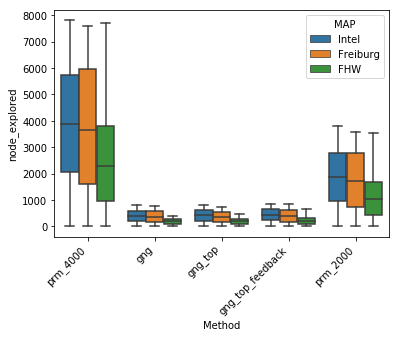

In [12]:
plot_df =cpy( pd_df[(pd_df["all_method_success"]==1) & 
                              (pd_df["Method"].isin(filtered_method_list))])
plot_df["node_explored"] = pd.to_numeric(plot_df["node_explored"])
plt.figure(figsize=(6,5))
ax = sns.boxplot(data =plot_df,
                y = "node_explored", hue = "MAP", order=["prm_4000","gng", "gng_top", "gng_top_feedback", "prm_2000"],  x= "Method")
plt.subplots_adjust(bottom=0.25)
ax.set_xticklabels(
    ax.get_xticklabels(), 
    rotation=45, 
    horizontalalignment='right',
#     fontweight='light',
#     fontsize='x-large'
)
plt.savefig("node_explored_box_plot.eps")
print("Method")


## list(ax.get_xticklabels())

In [13]:
plt.gcf().clear()
plt.clf()

<Figure size 432x288 with 0 Axes>

# Success Count Plots

In [14]:
sc_df = pd.DataFrame.from_dict({"MAP":[],"Method":[],"success_count":[]})
for env in env_list:
    for m in method_list:
        c_ = sum(pd_df[(pd_df["Method"]==m) & (pd_df["MAP"]==env)]["success"].tolist())
        sc_df.loc[len(sc_df)] = (env,m,c_)

In [32]:
# Normalization Code
sc_df["ground_success"] = [sc_df[(sc_df["Method"]=="prm_4000") & (sc_df["MAP"]==M)]["success_count"].tolist()[0] for M in sc_df["MAP"]]
sc_df["success metric"] = [100*s/500 for s,g in zip(sc_df["success_count"],sc_df["ground_success"])]

In [33]:
# for i in list(sc_df["success_count"]):
#     print(f"{i:.3f}")
# for me in method_list:
#     print(me)

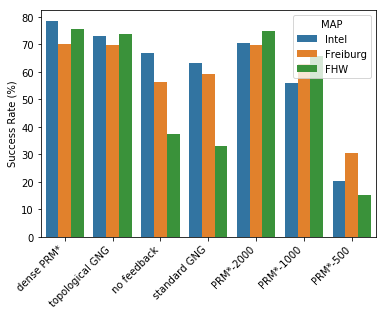

In [36]:
plt.figure(figsize=(6,5))
ax = sns.barplot(data = sc_df, y = "success metric", hue = "MAP", order=["prm_4000","gng_top_feedback","gng_top", "gng", "prm_2000", "prm_1000", "prm_500"],  x= "Method")

plt.subplots_adjust(bottom=0.25)
ax.set(xlabel='', ylabel='Success Rate (%)')
ax.set_xticklabels(
    ["dense PRM*","topological GNG","no feedback", "standard GNG", "PRM*-2000", "PRM*-1000", "PRM*-500"], 
    rotation=45, 
    horizontalalignment='right',
)
plt.savefig("star_success_count_plots.png", dpi=300)

In [37]:
plt.gcf().clear()
plt.clf()

<Figure size 432x288 with 0 Axes>

# SPC Metric

In [38]:
spc_df = cpy(pd_df)

In [41]:
spc_df = pd.DataFrame.from_dict({"MAP":[],"Method":[],"spc_metric":[]})

def calculate_spc_metric(env, method):
    pk_file_m = method_env_to_pickle_file_map[env][method]
    pk_file_dense = method_env_to_pickle_file_map[env]["prm_4000"]
    
    row_calculus_sum = 0
    for i in range(len(pk_file_m[0])):
        if pk_file_dense[0][i] and pk_file_m[0][i]:
            row_calculus_sum += pk_file_dense[2][i] / pk_file_m[2][i] #( max(pk_file_dense[2][i],pk_file_m[2][i]) )
            
    return row_calculus_sum

for e in env_list:
    for m in method_list:
        spc_metric = calculate_spc_metric(e,m)
        spc_df.loc[len(spc_df)] = (e,m,spc_metric)

In [42]:
# Normalization Code
spc_df["ground_spc_metric"] = [spc_df[(spc_df["Method"]=="prm_4000") & (spc_df["MAP"]==M)]["spc_metric"].tolist()[0] for M in spc_df["MAP"]]
spc_df["SPC metric"] = [s/g for s,g in zip(spc_df["spc_metric"],spc_df["ground_spc_metric"])]    
spc_df
for i in spc_df["SPC metric"]:
    print(f"{i:.3f}")

0.748
0.764
0.837
0.666
1.000
0.847
0.228
0.787
0.745
0.891
0.838
1.000
0.985
0.368
0.396
0.456
0.875
0.786
1.000
0.962
0.182


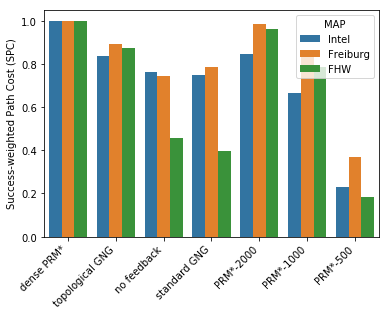

In [43]:
plt.figure(figsize=(6,5))
ax = sns.barplot(data = spc_df, y = "SPC metric", order=["prm_4000","gng_top_feedback","gng_top", "gng", "prm_2000", "prm_1000", "prm_500"], hue = "MAP" , x= "Method")
plt.subplots_adjust(bottom=0.25)
ax.set(xlabel='', ylabel='Success-weighted Path Cost (SPC)')
ax.set_xticklabels(
    ["dense PRM*","topological GNG","no feedback", "standard GNG", "PRM*-2000", "PRM*-1000", "PRM*-500"], 
    rotation=45, 
    horizontalalignment='right',

)

plt.savefig("star_spc_metric.png", dpi=300)

In [44]:
plt.gcf().clear()
plt.clf()

<Figure size 432x288 with 0 Axes>

# SNE metric


In [45]:
sne_df = cpy(pd_df)
sne_df = pd.DataFrame.from_dict({"MAP":[],"Method":[],"sne_metric":[]})

def calculate_sne_metric(env, method):
    pk_file_m = method_env_to_pickle_file_map[env][method]
    pk_file_dense = method_env_to_pickle_file_map[env]["prm_4000"]
    
    row_calculus_sum = 0
    for i in range(len(pk_file_m[0])):
        if pk_file_dense[0][i] and pk_file_m[0][i]:
            row_calculus_sum += pk_file_dense[1][i] / (pk_file_m[1][i])#( max(pk_file_dense[2][i],pk_file_m[2][i]) )
            
    return row_calculus_sum

for e in env_list:
    for m in method_list:
        sne_metric = calculate_sne_metric(e,m)
        sne_df.loc[len(sne_df)] = (e,m,sne_metric)

In [46]:
sne_df

,MAP,Method,sne_metric
0,Intel,gng,2944.092315
1,Intel,gng_top,3085.431491
2,Intel,gng_top_feedback,3249.149438
3,Intel,prm_1000,1337.157593
4,Intel,prm_4000,393.000000
5,Intel,prm_2000,729.016680
6,Intel,prm_500,1056.983609
7,Freiburg,gng,2754.397566
8,Freiburg,gng_top,2832.894730
9,Freiburg,gng_top_feedback,3184.017702


In [47]:
# normalization code
sne_df["ground_sne_metric"] = [sne_df[(sne_df["Method"]=="prm_4000") & (sne_df["MAP"]==M)]["sne_metric"].tolist()[0] for M in sne_df["MAP"]]
sne_df["SNE metric"] = [s/g for s,g in zip(sne_df["sne_metric"],sne_df["ground_sne_metric"])]
for i in sne_df["SNE metric"]:
    print(f"{i:.3f}")

7.491
7.851
8.268
3.402
1.000
1.855
2.690
7.870
8.094
9.097
4.109
1.000
2.089
4.164
5.099
5.886
10.174
4.244
1.000
2.145
2.135


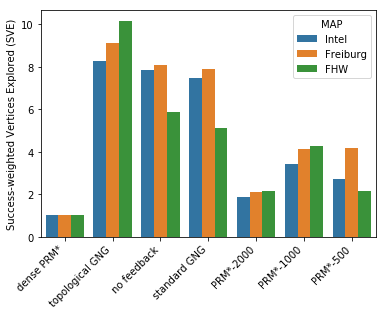

In [27]:
plt.figure(figsize=(6,5))
ax = sns.barplot(data = sne_df, y = "SNE metric", order=["prm_4000","gng_top_feedback","gng_top", "gng", "prm_2000", "prm_1000", "prm_500"], hue = "MAP" ,  x= "Method")
# plt.show()
plt.subplots_adjust(bottom=0.25)
ax.set(xlabel='', ylabel='Success-weighted Vertices Explored (SVE)')
ax.set_xticklabels(
    ["dense PRM*","topological GNG","no feedback", "standard GNG", "PRM*-2000", "PRM*-1000", "PRM*-500"], 
    rotation=45, 
    horizontalalignment='right',
)
plt.savefig("star_sve_metric.png", dpi=300)

In [28]:
sne_df

,MAP,Method,sne_metric,ground_sne_metric,SNE metric
0,Intel,gng,2944.092315,393.0,7.491329
1,Intel,gng_top,3085.431491,393.0,7.850971
2,Intel,gng_top_feedback,3249.149438,393.0,8.267556
3,Intel,prm_1000,1337.157593,393.0,3.402437
4,Intel,prm_4000,393.000000,393.0,1.000000
5,Intel,prm_2000,729.016680,393.0,1.855004
6,Intel,prm_500,1056.983609,393.0,2.689526
7,Freiburg,gng,2754.397566,350.0,7.869707
8,Freiburg,gng_top,2832.894730,350.0,8.093985
9,Freiburg,gng_top_feedback,3184.017702,350.0,9.097193
